In [1]:
import requests
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from fa2 import ForceAtlas2
import seaborn as sns
import numpy as np
from pprint import pprint
import pickle
import re
import string
import warnings
from itertools import combinations
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

# Get Dataframe with espiodes

In [2]:
url = 'https://southpark.fandom.com/wiki/List_of_Episodes'
page = pd.read_html(url)

In [3]:
len(page)

34

In [4]:
df_characters= pd.read_csv("characters.csv")
df_characters = df_characters[df_characters.Name != 'South Park']

In [5]:
def read_episode_cast(df_episodes):
    """Return list of episodes cast"""
    def get_cast(page_text):
        """Return cast for particular episode"""
        element_titles = re.findall('title="[\[[a-zA-Z0-9\'\\ -.]*', page_text)
        clean_txt = [tmp.replace('"', '').replace('title=', '') for tmp in element_titles]
        clean_txt = [tmp if tmp != 'Jerome &quot' else 'Jerome "Chef" McElroy' for tmp in clean_txt]
        cast = list(set(txt for txt in clean_txt if txt in df_characters.Name.values))
        return cast
    
    episode_cast = []
    for row in df_episodes.iterrows():
        title = row[1]['Title'].replace(' ', '_')
        title = title.replace('%', '%25')
        title = title.replace('!!!', '')
        title = title.replace('#', '')
        title = title.replace('\'', '%27')
        title = title.replace('?', '%3F')
        if title == 'Imaginationland_Episode_I':
            title = 'Imaginationland'
        elif title == 'Imaginationland_Episode_II':
            title == ' Imaginationland,_Episode_II'
        elif title == 'Crème_Fraiche':
            title == 'Crème_Fraiche'
        code = row[1]['Code']
        print(f'{code}: {title}')
        if code == '1414':
            episode_cast.append(['Stan Marsh', 'Kyle Broflovski', 'Eric Cartman', 'Kenny McCormick', 'Craig Tucker', 'Randy Marsh','Sharon Marsh', 'Sheila Broflovski', 'Michael', 'Rosemary', 'Alton Brown', 'Bobby Flay', 'Guy Fieri', 'Jamie Oliver', 'Paula Deen'])
        else:
            url_tmp = f'https://southpark.fandom.com/wiki/{title}/Script'
            response = requests.get(url_tmp)
            episode_cast.append(get_cast(response.text))
    return episode_cast

In [6]:
def get_episodes_df(page):
    "Return data frame with episodes data"
    def clear_df(df):
        df_tmp = df.drop([0], axis=1)
        df_tmp.columns = df_tmp.loc[0].values
        df_tmp = df_tmp.drop([0])
        df_clean = df_tmp[(df_tmp['#'].str.isnumeric() == True) | (df_tmp['#'].isna() == True)].copy()
        df_clean['Title'] = df_clean['Title'].str.replace('\"', '')
        df_clean = df_clean[df_clean['Title'] != 'TBA']
        descriptions = [df_tmp.loc[i+1].values[0] for i in df_clean.index]
        df_clean['Descriptions'] = descriptions
        df_clean.reset_index(drop=True, inplace=True)
        return df_clean
    
    df_list = []

    for i, df_tmp in enumerate(page[4:28], start=1):
        df_tmp = clear_df(df_tmp)
        df_tmp['Cast'] = read_episode_cast(df_tmp)
        df_tmp['Season'] = i
        df_list.append(df_tmp)

    df_episodes = pd.concat(df_list, ignore_index=True)
    return df_episodes

In [7]:
df_episodes = get_episodes_df(page)

101: Cartman_Gets_an_Anal_Probe
102: Weight_Gain_4000
103: Volcano
104: Big_Gay_Al%27s_Big_Gay_Boat_Ride
105: An_Elephant_Makes_Love_to_a_Pig
106: Death
107: Pinkeye
109: Starvin%27_Marvin
110: Mr._Hankey,_the_Christmas_Poo
108: Damien
111: Tom%27s_Rhinoplasty
112: Mecha-Streisand
113: Cartman%27s_Mom_is_a_Dirty_Slut
201: Terrance_and_Phillip_in_Not_Without_My_Anus
202: Cartman%27s_Mom_is_Still_a_Dirty_Slut
204: Ike%27s_Wee_Wee
203: Chickenlover
205: Conjoined_Fetus_Lady
206: The_Mexican_Staring_Frog_of_Southern_Sri_Lanka
207: City_on_the_Edge_of_Forever_(Flashbacks)
208: Summer_Sucks
209: Chef%27s_Chocolate_Salty_Balls
210: Chickenpox
211: Roger_Ebert_Should_Lay_off_the_Fatty_Foods
212: Clubhouses
213: Cow_Days
214: Chef_Aid
215: Spookyfish
216: Merry_Christmas_Charlie_Manson!
217: Gnomes
218: Prehistoric_Ice_Man
301: Rainforest_Shmainforest
302: Spontaneous_Combustion
303: The_Succubus
305: Jakovasaurs
304: Tweek_vs._Craig
306: Sexual_Harassment_Panda
307: Cat_Orgy
308: Two_Guys_Nake

In [8]:
df_episodes.head(10)

,Title,Air Date,Code,#,Descriptions,Cast,Season
0,Cartman Gets an Anal Probe,"August 13, 1997",101,1,"While the boys are waiting for the school bus,...","[Jason White, Herbert Garrison, Pip Pirrip, Li...",1
1,Weight Gain 4000,"August 20, 1997",102,2,When Cartman's environmental essay wins a nati...,"[Clyde Donovan, Weight Gain 4000 Ad Actor, Her...",1
2,Volcano,"August 27, 1997",103,3,A weekend trip to experience the finer points ...,"[Lava and You Narrator, Scuzzlebutt, Herbert G...",1
3,Big Gay Al's Big Gay Boat Ride,"September 3, 1997",104,4,"When Stan discovers his new dog Sparky is gay,...","[Rex, Farmer Carl Denkins, Bill Allen, Big Gay...",1
4,An Elephant Makes Love to a Pig,"September 10, 1997",105,5,"Kyle's mom won't let him keep his new pet, an ...","[Shelly Marsh, Bill Allen, Mr. Hat, Stan Marsh...",1
5,Death,"September 17, 1997",106,6,Grandpa's sole birthday wish is for Stan to ta...,"[Shelly Marsh, Marvin Marsh, Mr. Hat, Stan Mar...",1
6,Pinkeye,"October 29, 1997",107,7,A mishap at the morgue transforms the resident...,"[Principal Victoria, Bill Allen, Mr. Hat, Stan...",1
7,Starvin' Marvin,"November 19, 1997",109,8,Mistaking Cartman for a starving African child...,"[Principal Victoria, Mutant Turkeys, Mr. Hat, ...",1
8,"Mr. Hankey, the Christmas Poo","December 17, 1997",110,9,While South Park Elementary is attempting to s...,"[Sheila Broflovski, Mr. Mackey, Herbert Garris...",1
9,Damien,"February 4, 1998",108,10,"After being shunned by the others kids, Damien...","[Mr. McDonald, Michael Buffer, Stan Marsh, Sat...",1


In [9]:
df_episodes.to_csv('episodes.csv')

# Get episodes scripts

In [10]:
import nltk
from nltk import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [11]:
with open('scripts.pickle', 'rb') as input_file:
    scripts = pickle.load(input_file)

In [12]:
def clear_text(text):
    """Clean text of dialogues"""
    text = re.sub("[\[].*?[\]]", "", text)
    text = text.replace("'", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    return text

In [13]:
def read_scripts(df_episodes):
    """Return dict with scripts for each episode"""
    def clear_script(script, code):
        "Return clean version of data frame with dialogues"
        if script.shape[1] > 2:
            df_tmp = script[[0, 1]].copy()
        else:
            df_tmp = script.copy()
        df_tmp.drop([0,1], inplace=True)
        df_tmp.columns = ['Character', 'Lines']
        df_tmp['Lines_clean'] = df_tmp["Lines"].apply(lambda x: clear_text(str(x)))
        df_tmp['Code'] = code
        return df_tmp
    
    scripts = {}
    valid = {}
    for row in df_episodes.iterrows():
        title = row[1]['Title'].replace(' ', '_')
        title = title.replace('%', '%25')
        title = title.replace('!!!', '')
        title = title.replace('#', '')
        title = title.replace('\'', '%27')
        title = title.replace('?', '%3F')
        if title == 'Imaginationland_Episode_I':
            title = 'Imaginationland'
        elif title == 'Imaginationland_Episode_II':
            title == ' Imaginationland,_Episode_II'
        elif title == 'Crème_Fraiche':
            title == 'Crème_Fraiche'
        code = row[1]['Code']
        print(f'{code}: {title}')
        if int(code) == 1414:
            df_1414 = pd.read_csv('1414.txt', sep='|', names=['Character', 'Lines'])
            df_1414['Character'].replace('ScriptScene', np.NaN, inplace=True)
            df_1414['Lines_clean'] = df_1414["Lines"].apply(lambda x: clear_text(str(x)))
            df_1414['Code'] = code
            scripts[code] = df_1414
        else:
            url_tmp = f'https://southpark.fandom.com/wiki/{title}/Script'
            script_raw = pd.read_html(url_tmp)
            scripts[code] = clear_script(script_raw[1], code)
        valid[code] = (len(script_raw), scripts[code].shape)
    return scripts, valid

In [14]:
scripts,valid = read_scripts(df_episodes)

101: Cartman_Gets_an_Anal_Probe
102: Weight_Gain_4000
103: Volcano
104: Big_Gay_Al%27s_Big_Gay_Boat_Ride
105: An_Elephant_Makes_Love_to_a_Pig
106: Death
107: Pinkeye
109: Starvin%27_Marvin
110: Mr._Hankey,_the_Christmas_Poo
108: Damien
111: Tom%27s_Rhinoplasty
112: Mecha-Streisand
113: Cartman%27s_Mom_is_a_Dirty_Slut
201: Terrance_and_Phillip_in_Not_Without_My_Anus
202: Cartman%27s_Mom_is_Still_a_Dirty_Slut
204: Ike%27s_Wee_Wee
203: Chickenlover
205: Conjoined_Fetus_Lady
206: The_Mexican_Staring_Frog_of_Southern_Sri_Lanka
207: City_on_the_Edge_of_Forever_(Flashbacks)
208: Summer_Sucks
209: Chef%27s_Chocolate_Salty_Balls
210: Chickenpox
211: Roger_Ebert_Should_Lay_off_the_Fatty_Foods
212: Clubhouses
213: Cow_Days
214: Chef_Aid
215: Spookyfish
216: Merry_Christmas_Charlie_Manson!
217: Gnomes
218: Prehistoric_Ice_Man
301: Rainforest_Shmainforest
302: Spontaneous_Combustion
303: The_Succubus
305: Jakovasaurs
304: Tweek_vs._Craig
306: Sexual_Harassment_Panda
307: Cat_Orgy
308: Two_Guys_Nake

In [15]:
with open('scripts.pickle', 'wb') as file:
    pickle.dump(scripts, file, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
# Create one dataframe with all dialogues
episodes_lines = []
for episode in df_episodes.Code.values:
    df_tmp = scripts[episode].copy()
    df_tmp = df_tmp[df_tmp.Character.isna() == False]
    df_tmp = df_tmp[df_tmp.Character != df_tmp.Lines]
    df_tmp['Season'] = df_episodes[df_episodes.Code == episode].Season.values[0]
    episodes_lines.append(df_tmp)
    
df_lines = pd.concat(episodes_lines, ignore_index=True)

In [36]:
df_lines.head(10)

,Character,Lines,Lines_clean,Code,Season
0,The boys,"School days, school days, teacher's golden ru...","School days, school days, teachers golden ru...",101,1
1,Kyle Broflovski,"Ah, damn it! My little brother's trying to fol...","Ah, damn it! My little brothers trying to foll...",101,1
2,Ike Broflovski,Eat banana.,Eat banana.,101,1
3,Kyle,"Ike, you can't come to school with me. [Ike Ch...","Ike, you cant come to school with me.",101,1
4,Eric Cartman,"Yeah, go home you little dildo!","Yeah, go home you little dildo!",101,1
5,Kyle,"Dude, don't call my brother a dildo!","Dude, dont call my brother a dildo!",101,1
6,Stan Marsh,What's a dildo?,Whats a dildo?,101,1
7,Kyle,"Well, I don't know...[He faces Cartman and poi...","Well, I dont know... and Ill bet Cartman doesn...",101,1
8,Cartman,I know what it means!,I know what it means!,101,1
9,Kyle,"Well, what?","Well, what?",101,1


In [18]:
df_lines.to_csv("lines.csv", index=False)

# Episodes network

In [19]:
episode_edges = [list(combinations(cast, 2)) for cast in df_episodes.Cast.values]

In [20]:
G = nx.Graph()
G.add_nodes_from(df_characters.Name.values)

In [21]:
edges = [edge for episode_edges_list in episode_edges for edge in episode_edges_list]

In [22]:
G.add_edges_from(set(edges))

In [23]:
gcc = nx.read_gpickle('network/SouthParkEpisodesNetwork.gpickle')

In [24]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
gcc = G.subgraph(Gcc[0])

In [25]:
len(gcc.edges())

22476

In [26]:
len(gcc.nodes())

1171

In [27]:
node_sizes = [8*v for v in dict(gcc.degree).values()]

In [28]:
# Setup FA2 w. parameters
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,    # Dissuade hubs
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=False
)

# compute node positions with the fa algorithm
node_pos = forceatlas2.forceatlas2_networkx_layout(gcc, pos=None, iterations=2000)

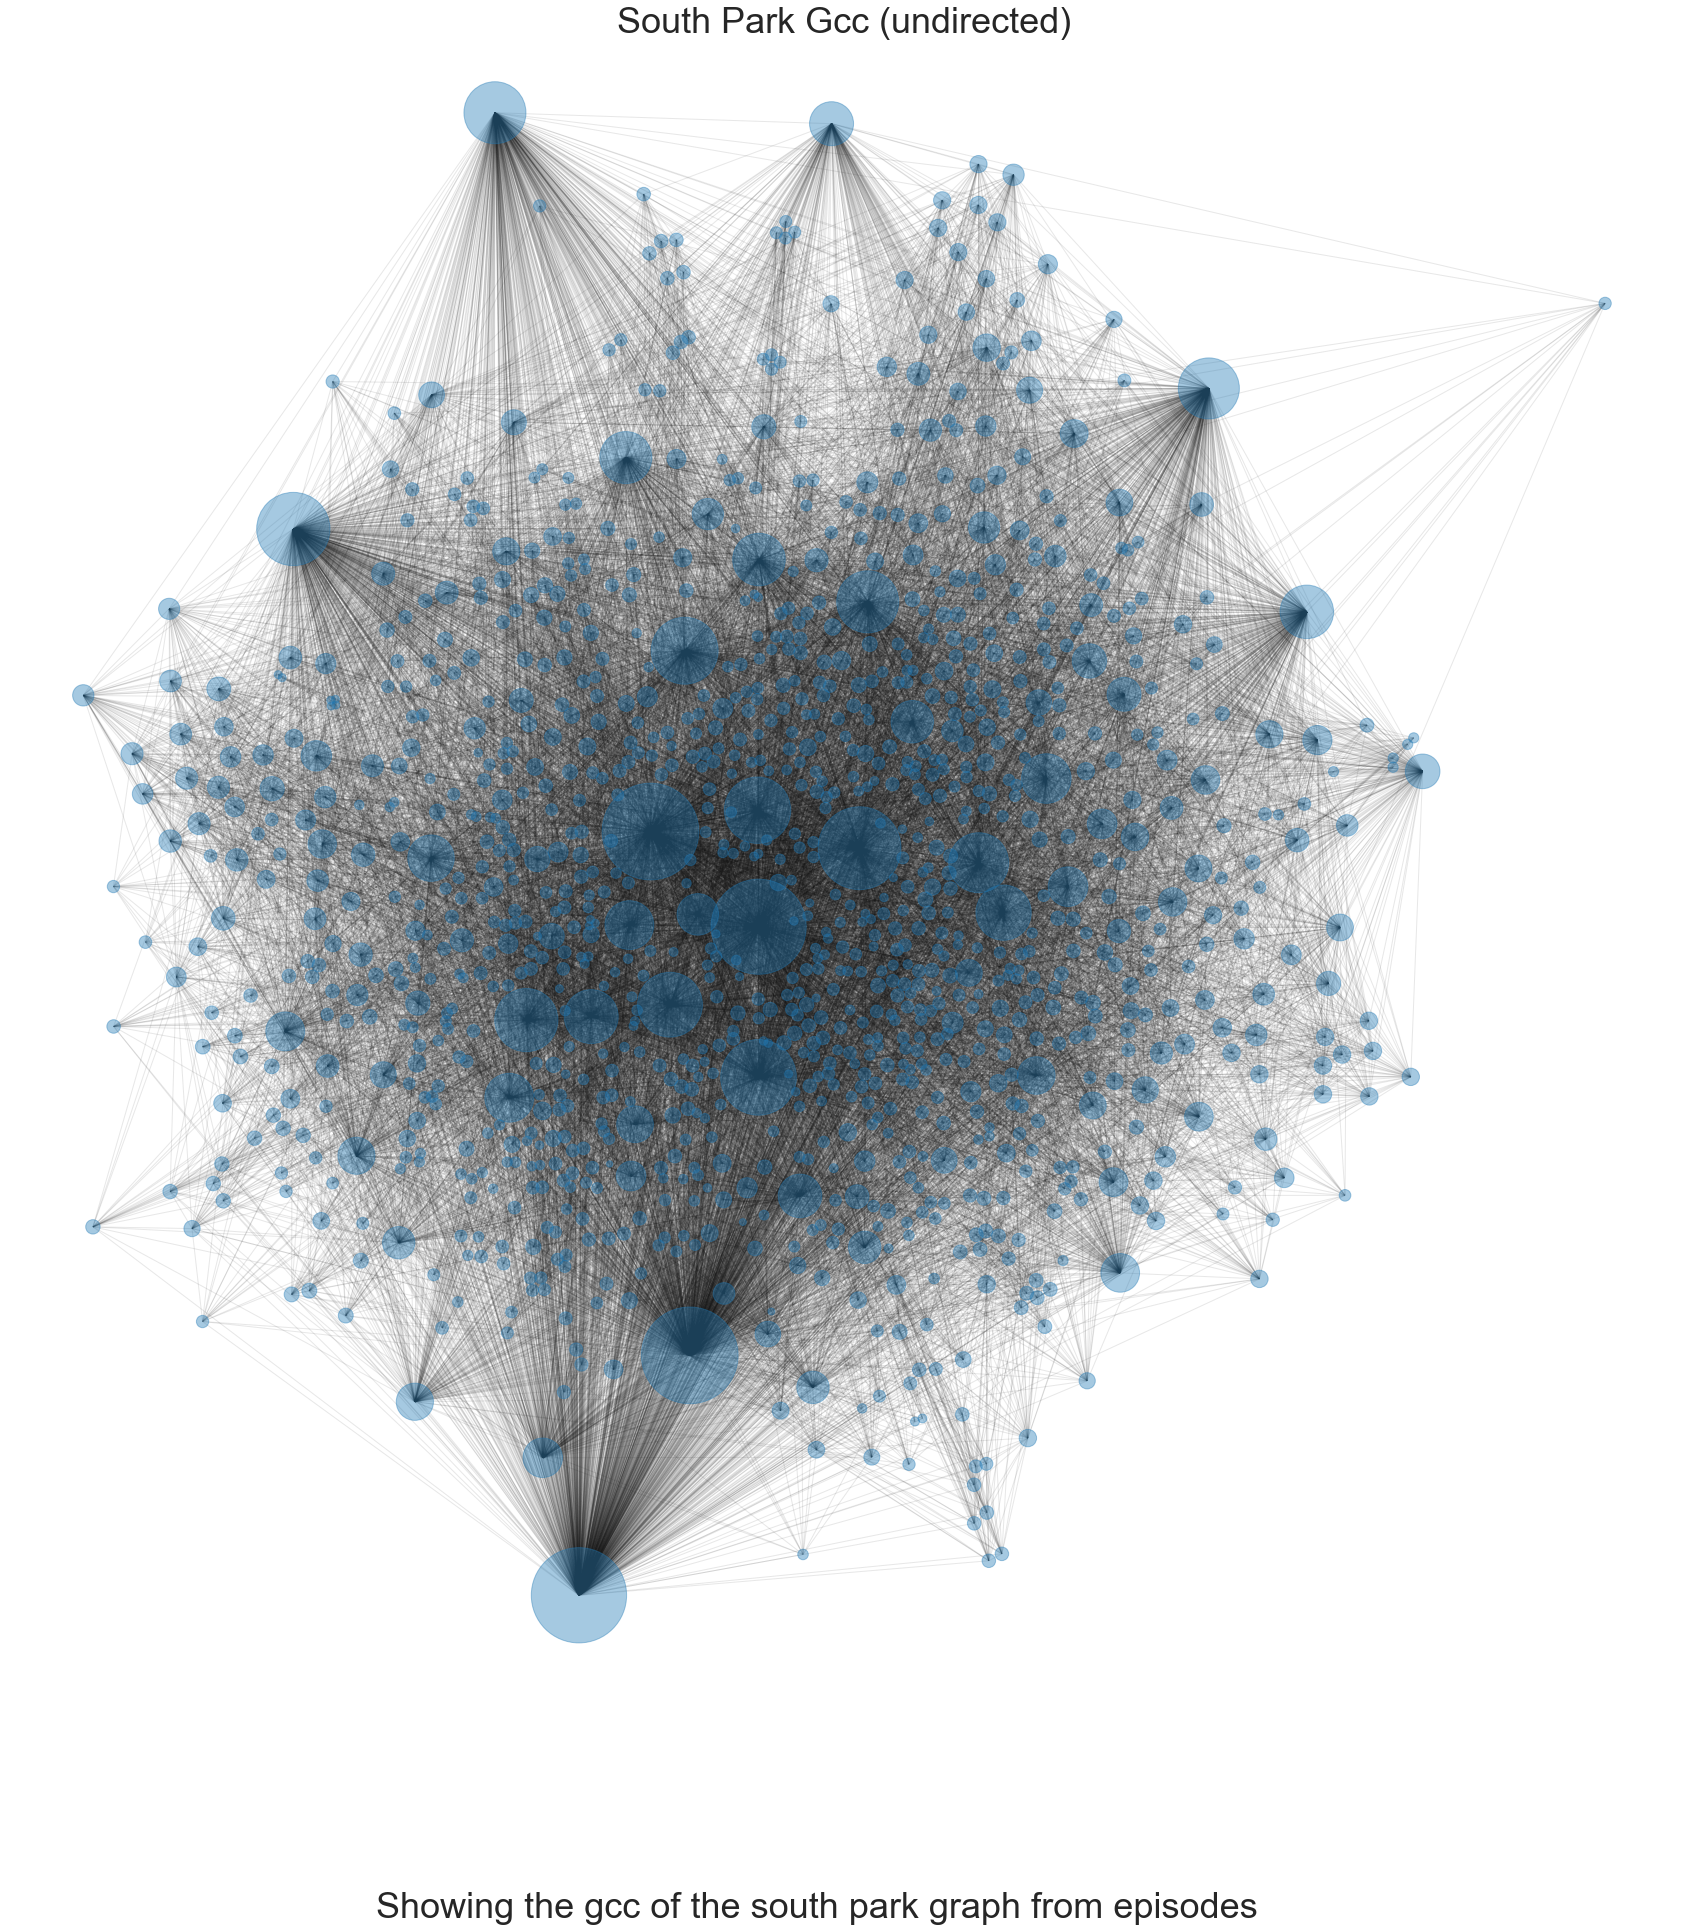

In [29]:
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(gcc, node_pos, node_size=node_sizes, alpha=0.4)
nx.draw_networkx_edges(gcc, node_pos, alpha=0.1)
# nx.draw_networkx_labels(gcc, node_pos, font_size=18)
plt.title('South Park Gcc (undirected)', fontsize=36)
plt.axis('off')
fig_text = """Showing the gcc of the south park graph from episodes"""
plt.figtext(
    0.5, 0.01, wrap=True, horizontalalignment='center', fontsize=36, s=fig_text
)
# plt.savefig("Graph_episodes.png", format="PNG")
plt.show()

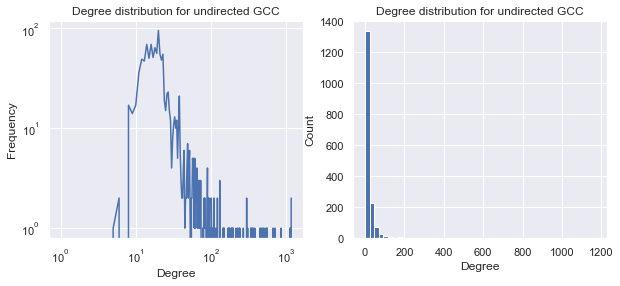

In [33]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
degree_freq = nx.degree_histogram(gcc)
degrees = range(len(degree_freq))
ax[0].loglog(degrees, degree_freq,'-') 
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Frequency')
ax[0].set_title("Degree distribution for undirected GCC")
degrees = [val for (node, val) in G.degree()]
d1 = np.array(degrees)
ax[1].hist(d1, bins = 50) 
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Count')
_= ax[1].set_title("Degree distribution for undirected GCC")

In [34]:
sorted(gcc.degree, key=lambda x: x[1], reverse=True)[0:25]

[('Kenny McCormick', 1170),
 ('Eric Cartman', 1170),
 ('Stan Marsh', 1135),
 ('Kyle Broflovski', 1132),
 ('Butters Stotch', 859),
 ('Randy Marsh', 717),
 ('Herbert Garrison', 672),
 ('Mr. Mackey', 561),
 ('Sharon Marsh', 552),
 ('Gerald Broflovski', 526),
 ('Sheila Broflovski', 500),
 ('Clyde Donovan', 482),
 ('Liane Cartman', 481),
 ('Stephen Stotch', 466),
 ('Craig Tucker', 450),
 ('Jimmy Valmer', 383),
 ('Jimbo Kern', 365),
 ('Token Black', 358),
 ('Wendy Testaburger', 346),
 ('Principal Victoria', 339),
 ('Linda Stotch', 308),
 ('Mayor McDaniels', 299),
 ('Ike Broflovski', 299),
 ('Officer Barbrady', 270),
 ('Bebe Stevens', 242)]

In [32]:
nx.write_gpickle(gcc, 'network/SouthParkEpisodesNetwork.gpickle')